### Uppgift 1 - Landstatistik

Ni får ett land tilldelat till er grupp. Börja med att anonymisera kolumnen med idrottarnas namn med
hashfunktionen SHA-256.  

Undersök därefter hur det gått för landet i OS genom tiderna. Visualisera exempelvis:  
- de sporter landet fått flest medaljer i
- antal medaljer per OS
- histogram över åldrar
- Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.

In [165]:
import hashlib as hl
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
athlete_events = pd.read_csv("../Projekt-OS-Italien/Data/athlete_events.csv")

In [167]:
# Börja med att anonymisera kolumnen med idrottarnas namn med
# hashfunktionen SHA-256.  

athlete_events["Name"] = athlete_events["Name"].apply(lambda name: hl.sha256(name.encode()).hexdigest())
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### Undersök därefter hur det gått för Italien i OS genom tiderna. Visualisera exempelvis:  

In [168]:
athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [169]:
# de sporter landet fått flest medaljer i

medals = athlete_events.query("Medal == 'Gold' or Medal == 'Silver' or Medal == 'Bronze'")
italy_medals = medals.query("Team == 'Italy'")

italy_medals.value_counts("Medal")


Medal
Gold      535
Silver    508
Bronze    484
Name: count, dtype: int64

In [170]:
italy_medals_count = italy_medals.value_counts("Sport")

### Conclusion

Italy has won the most medals in Fencing, Rowing, Cycling, and Water Polo.

In [171]:
px.bar(
    italy_medals_count,
    title="Italy medals",
    labels={"value": "Number of medals", 
            "variable": "Medals", 
            "count": "Number of medals"},
    template="simple_white"
    )

In [172]:
italy_medals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,1c1026605c0607937a724d3d839d964064f6907b3b2e0e...,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
214,103,5a52f67df03607d3096242e2779913d915ccb30d26438f...,M,25.0,NaN,NaN,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold
219,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,29.0,188.0,96.0,Italy,ITA,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Double Sculls,Gold
220,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,34.0,188.0,96.0,Italy,ITA,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,Gold


In [173]:
# antal medaljer per OS

medals_per_game = italy_medals.groupby("Year")[["Season"]].value_counts()
medals_per_game

Year  Season
1900  Summer      5
1906  Summer      9
1908  Summer      8
1912  Summer     25
1920  Summer     84
1924  Summer     51
1928  Summer     72
1932  Summer     77
1936  Summer     70
1948  Summer     67
      Winter      1
1952  Summer     52
      Winter      2
1956  Summer     45
1960  Summer     85
      Winter      1
1964  Summer     51
1968  Summer     33
      Winter      2
1972  Summer     25
      Winter      3
1976  Summer     31
      Winter      4
1980  Summer     37
      Winter      1
1984  Summer     63
      Winter      2
1988  Summer     29
      Winter      8
1992  Summer     45
      Winter     19
1994  Winter     26
1996  Summer     71
1998  Winter     15
2000  Summer     65
2002  Winter     19
2004  Summer    104
2006  Winter     21
2008  Summer     42
2010  Winter      5
2012  Summer     68
2014  Winter     14
2016  Summer     70
Name: count, dtype: int64

Text(0.5, 1.0, 'Italy medals by year')

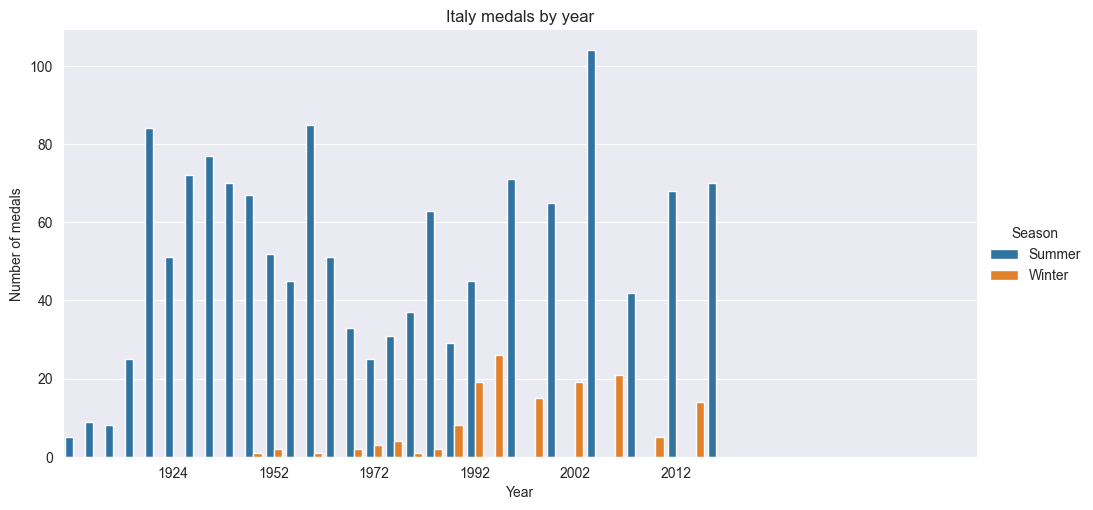

In [174]:
sns.set_style('darkgrid')
sns.catplot(x='Year', kind = 'count', hue = 'Season', data = italy_medals, aspect=2)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.ylabel("Number of medals")
plt.title("Italy medals by year")

# sns.set_style('darkgrid')
# sns.catplot(x='Age', kind = 'count', hue = 'Sex', data = medals_per_game)
# 



In [175]:
age_count = italy_medals["Age"].value_counts()
age_count

Age
25.0    126
23.0    126
21.0    116
26.0     98
24.0     96
22.0     96
29.0     96
27.0     87
28.0     82
20.0     79
31.0     75
30.0     64
33.0     63
32.0     47
34.0     44
19.0     32
35.0     28
37.0     27
36.0     25
38.0     18
18.0     17
39.0     11
17.0      9
43.0      8
40.0      7
16.0      6
14.0      6
46.0      5
41.0      5
42.0      5
15.0      3
45.0      3
44.0      2
49.0      2
12.0      2
47.0      1
11.0      1
59.0      1
57.0      1
13.0      1
Name: count, dtype: int64

In [176]:

italy_medals["Age"].isna().sum()


6

In [177]:
# Histogram över åldrar för medaljörer

fig = px.histogram(
    age_count,
    x=age_count.index,
    y=age_count.values,
    nbins=len(age_count.index),
    labels={
        "Age": "Age Group", 
        "sum of y": "Number of Athletes"
    },
    title="Total number of medal awarded athletes per age group",
    template="simple_white",
)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(yaxis_title="Number of medals")

In [178]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [179]:
italy_athletes = athlete_events.query("Team == 'Italy'")
italy_athletes.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
148328,74420,56757950d10ecec7afc67c622532dc8cad1df1292148d4...,M,37.0,NaN,NaN,Italy,ITA,1956 Summer,1956,Summer,Melbourne,Fencing,"Fencing Men's epee, Team",Gold
72017,36637,019a50a594e92adb7fff07b97d8e93c18bdbb877353c9b...,F,17.0,178.0,61.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Individual Medley,NaN
36259,18628,af937a4a3b77a3228a2bbfa40f714e13504d8fb151a1a9...,M,22.0,NaN,NaN,Italy,ITA,1908 Summer,1908,Summer,London,Athletics,Athletics Men's 400 metres,NaN


In [180]:
italy_athletes.isna().sum()

ID           0
Name         0
Sex          0
Age        338
Height    2488
Weight    2798
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     8733
dtype: int64

In [181]:
#merged_df.dropna(subset=['Population  (2023)'], inplace=True)

# italy_athletes.dropna(subset=['Age'], inplace=True)
# italy_athletes.isna().sum()

In [182]:
all_italy_athletes = italy_athletes["Age"].value_counts()
all_italy_athletes

Age
23.0    836
24.0    825
22.0    743
21.0    679
25.0    674
26.0    664
27.0    592
20.0    590
28.0    575
29.0    492
30.0    416
19.0    356
31.0    350
18.0    254
32.0    254
33.0    233
34.0    201
17.0    183
16.0    143
36.0    141
35.0    128
37.0     90
15.0     85
38.0     74
39.0     54
14.0     34
45.0     32
41.0     30
43.0     30
42.0     27
40.0     22
44.0     20
46.0     17
47.0     14
13.0      9
71.0      9
48.0      7
49.0      5
51.0      5
54.0      4
12.0      4
56.0      3
50.0      3
62.0      3
55.0      2
52.0      2
53.0      2
63.0      2
11.0      1
61.0      1
59.0      1
57.0      1
Name: count, dtype: int64

In [183]:
fig = px.histogram(
    all_italy_athletes,
    x=all_italy_athletes.index,
    y=all_italy_athletes.values,
    nbins=len(all_italy_athletes.index),
    # labels={
    #     "values": "Total number of athletes"
    # },
    title="Total number of athletes per age group",
    template="simple_white"
)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(yaxis_title="Number of athletes")

fig.show()

Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.

In [184]:
italy_athletes.head(5)
italy_athletes.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10260 entries, 158 to 270894
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10260 non-null  int64  
 1   Name    10260 non-null  object 
 2   Sex     10260 non-null  object 
 3   Age     9922 non-null   float64
 4   Height  7772 non-null   float64
 5   Weight  7462 non-null   float64
 6   Team    10260 non-null  object 
 7   NOC     10260 non-null  object 
 8   Games   10260 non-null  object 
 9   Year    10260 non-null  int64  
 10  Season  10260 non-null  object 
 11  City    10260 non-null  object 
 12  Sport   10260 non-null  object 
 13  Event   10260 non-null  object 
 14  Medal   1527 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.3+ MB


In [185]:
italy_events = athlete_events.query("Team == 'Italy'")

In [186]:
italy_events.isna().sum()
italy_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,1c1026605c0607937a724d3d839d964064f6907b3b2e0e...,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,91,d5ce4ad5e9aa7549d6069b66cfefa8df14d801fd845cc7...,M,27.0,190.0,80.0,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,92,207f8f997895f35185acbd1e26fab5176d8b3dc6f3300f...,M,21.0,180.0,73.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
214,103,5a52f67df03607d3096242e2779913d915ccb30d26438f...,M,25.0,NaN,NaN,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [187]:
# BMI = kg/((height/100)**2)
# Normal BMI: 18.5 to 24.9

italy_events["BMI"] = italy_events["Weight"] / ((italy_events["Height"]/100)**2)

fig = px.scatter(
    italy_events,
    x="Sport",
    y="BMI",
    color="Sex"
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45
    )
)

C:\Users\Student\AppData\Local\Temp\ipykernel_9580\2465150784.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [188]:
fig = px.scatter(
    italy_events,
    x="Age",
    y="BMI",
    color="Sex",
    hover_data=["Sport", "Year"]
)

# fig.add_shape(
#     type='line',
#     x0=italy_events['x'].min(),
#     x1=italy_events['x'].max(),
#     y0=18.5,
#     y1=18.5,
#     line=dict(color='red', width=2, dash='dash'),
#     name="Min range healthy BMI"
# )
# fig.add_shape(
#     type='line',
#     x0=italy_events['x'].min(),
#     x1=italy_events['x'].max(),
#     y0=24.9,
#     y1=24.9,
#     line=dict(color='red', width=2, dash='dash'),
#     name="Max range healthy BMI"
# )
fig.show()

In [189]:
italy_events["Height"].agg('mean')

175.22027792074113

In [200]:
sport_heights_mean = italy_events.groupby('Sport').agg({'Height': 'mean'})

type(sport_heights_mean)

pandas.core.frame.DataFrame

In [203]:
sport_heights_mean = sport_heights_mean.dropna()

In [205]:
fig = px.bar(
    sport_heights_mean.sort(),
    x=sport_heights_mean.index,
    y="Height",
    title="Average athlete height per sport",
    template="simple_white"
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45
    )
)

fig.show()